# **TREES**

this script is for setup, execution, and analysis of the different algorithms that use decision trees

In [2]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import funcs as f
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
'''
Import data from data_organization.ipynb and set random seed

'''

df_all = pd.read_csv('../data/df_all.csv').drop('Unnamed: 0', axis = 1)
df_gus = pd.read_csv('../data/df_gus.csv').drop('Unnamed: 0', axis = 1)
df_tgus = pd.read_csv('../data/df_tgus.csv').drop('Unnamed: 0', axis = 1)
df_tgus_st = pd.read_csv('../data/df_tgus*.csv').drop('Unnamed: 0', axis = 1)
df_raw = pd.read_csv('../data/df_raw.csv').drop('Unnamed: 0', axis = 1)

np.random.seed(8)

## **bagging**


In [47]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score

# Random trees are usually used just in ensemble methods
# so we have to manually specify we only want one to start
#random_tree = ExtraTreesClassifier(n_estimators = 1, bootstrap=True)
random_tree = DecisionTreeClassifier()
# Bagging based on random trees, here we aggregate 10 random trees
clf = BaggingClassifier(base_estimator = random_tree,
                                        n_estimators = 100, bootstrap = True
                                       )

In [50]:
'''
Considering GUS, TGUS,  TGUS*, and raw values with other features

'''

all_model, all_train_acc, all_val_acc, all_test_acc = f.kfold_crossval(df_all, clf, 'bagging')

print('All - Results:')
print(f'Best Training Accuracy: {all_train_acc}%')
print(f'Best Validation Accuracy: {all_val_acc}%')
print(f'Test Accuracy: {all_test_acc}%\n')

All - Results:
Best Training Accuracy: 100.0%
Best Validation Accuracy: 98.6%
Test Accuracy: 100.0%



In [77]:
#set train and test data
df_all=df_all.sample(frac=1) 
train_proportion = 0.8 
n = len(df_all)
t = int(train_proportion * n)

# separate training and test sets
y = df_all['detected']
X = df_all.loc[:, ~df_all.columns.isin(['detected'])]

#features in training set
train_x = X.iloc[:t,:].reset_index().iloc[:,1:]
#features in test set
test_x = X.iloc[t:,:].reset_index().iloc[:,1:]
#targets in train set
train_y = pd.Series(y[:t].reset_index().iloc[:,1:].iloc[:,0])
#targets in test set
test_y = pd.Series(y[t:].reset_index().iloc[:,1:].iloc[:,0])

In [22]:
cross_val_score(bagged_random_trees, X, y,
                scoring="accuracy", 
                cv=8).mean()

bagged_random_trees = BaggingClassifier(base_estimator = random_tree,
                                        n_estimators = 100, bootstrap=True
                                       )

cross_val_score(bagged_random_trees, train_x, train_y,
                scoring="accuracy", 
                cv=6).mean()

0.9881623071763918

In [33]:
"""NEED TO ACTUALLY FIT(XY) !!!!!!!"""
clf.fit(train_x,train_y)
clf.get_depth()

AttributeError: 'BaggingClassifier' object has no attribute 'get_depth'

In [67]:

random_tree.fit(X,y)
random_tree.get_depth()
#print(random_tree.feature_importances_)



6

In [78]:
# So let's test a range of depths from 2:6 using a for loop

depths = np.arange(2,7) # define the depths
results = [] # create an empty data frame for our results

for depth in depths:
    best_depth_tree = DecisionTreeClassifier(max_depth = depth) # creating an instance of a decision tree
    results.append(cross_val_score(best_depth_tree, train_x, 
                                   train_y, scoring="accuracy", # getting the cv accuracy metric for the tree at each depth
                cv=6).mean())

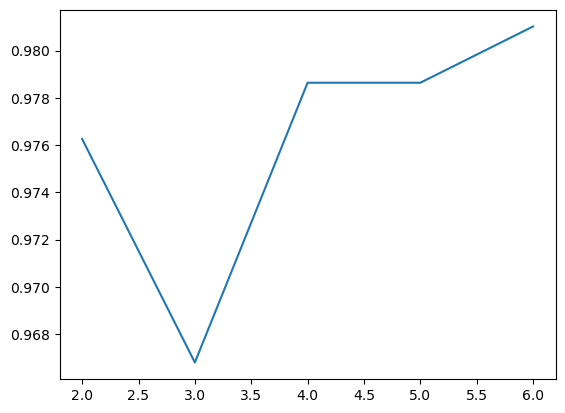

In [80]:
test = pd.DataFrame({'depths':depths, 'mean_roc_auc':results})
test.sort_values("mean_roc_auc", ascending=False)
plt.plot(test.depths, test.mean_roc_auc)